### <center> Breast Cancer Prediction </center>
#### <center> Prepared by Orhun </center>

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import classification_report

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = "" #You have to put breast cancer dataset's google drive id
downloaded = drive.CreateFile({'id':file_id})
downloaded.FetchMetadata(fetch_all=True)
downloaded.GetContentFile(downloaded.metadata['title'])

In [4]:
df_cancer = pd.read_csv("breast-cancer-wisconsin.data.csv")

In [5]:
df_cancer.columns =['Patient_ID_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size', 'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 
                    'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

In [6]:
df_cancer

,Patient_ID_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [7]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Patient_ID_number            698 non-null    int64
 1   Clump_Thickness              698 non-null    int64
 2   Uniformity_of_Cell_Size      698 non-null    int64
 3   Uniformity_of_Cell_Shape     698 non-null    int64
 4   Marginal_Adhesion            698 non-null    int64
 5   Single_Epithelial_Cell_Size  698 non-null    int64
 6   Bare_Nuclei                  698 non-null    int64
 7   Bland_Chromatin              698 non-null    int64
 8   Normal_Nucleoli              698 non-null    int64
 9   Mitoses                      698 non-null    int64
 10  Class                        698 non-null    int64
dtypes: int64(11)
memory usage: 60.1 KB


## 1) Split the data set into training and testing subsets

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
def categorical_to_numeric_diagnosis(x):
    if x==2:
        return 1
    if x==4:
        return 0

In [10]:
df_cancer['Class']= df_cancer['Class'].apply(categorical_to_numeric_diagnosis) # 2(benign) => 1   , 4(malignant) =>0

In [11]:
y = df_cancer["Class"]
X = df_cancer.drop(["Class","Patient_ID_number"],axis=1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (488, 9)
X_test (210, 9)
y_train (488,)
y_test (210,)


## 2) Does the data require scaling? If so, perform data scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = MinMaxScaler()
scaler2 = StandardScaler()

In [16]:
X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled = scaler2.fit_transform(X_test)

##3) Define a sequential layered neural network architecture. Experiment with 2, 3, and 4 layers. You can decide on the number of neurons in each layer.

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

import matplotlib.pyplot as plt

### 3-1) 

#### Model 1 = 2 Layers with 3 Neurons

#### Model 2 = 3 Layers with 8 Neurons

#### Model 3 = 4 Layers with 20 Neurons

In [18]:
model1 = Sequential()

model1.add(Dense(units = 3, activation = 'relu', input_dim = 9))
#model1.add(Dropout(rate = 0.1))

model1.add(Dense(units = 3, activation = 'relu'))
#model1.add(Dropout(rate = 0.1))

model1.add(Dense(units = 1, activation = 'sigmoid'))

In [19]:
model2 = Sequential()

model2.add(Dense(units = 8, activation = 'relu', input_dim = 9))
#model2.add(Dropout(rate = 0.1))

model2.add(Dense(units = 8, activation = 'relu'))
#model2.add(Dropout(rate = 0.1))

model2.add(Dense(units = 8, activation = 'relu'))
#model2.add(Dropout(rate = 0.1))

model2.add(Dense(units = 1, activation = 'sigmoid'))

In [20]:
model3 = Sequential()

model3.add(Dense(units = 20, activation = 'relu', input_dim = 9))
model3.add(Dropout(rate = 0.1))

model3.add(Dense(units = 20, activation = 'relu'))
model3.add(Dropout(rate = 0.1))

model3.add(Dense(units = 20, activation = 'relu'))
model3.add(Dropout(rate = 0.1))

model3.add(Dense(units = 20, activation = 'relu'))
model3.add(Dropout(rate = 0.1))

model3.add(Dense(units = 1, activation = 'sigmoid'))

In [21]:
model1.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model2.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model3.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [22]:
history1 = model1.fit(X_train_scaled, y_train, epochs=30, verbose=1)

Epoch 1/30
16/16 [==============================] - 4s 3ms/step - loss: 0.7460 - accuracy: 0.3033
Epoch 2/30
16/16 [==============================] - 0s 2ms/step - loss: 0.7128 - accuracy: 0.4037
Epoch 3/30
16/16 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.5102
Epoch 4/30
16/16 [==============================] - 0s 2ms/step - loss: 0.6599 - accuracy: 0.6004
Epoch 5/30
16/16 [==============================] - 0s 2ms/step - loss: 0.6300 - accuracy: 0.6865
Epoch 6/30
16/16 [==============================] - 0s 2ms/step - loss: 0.5919 - accuracy: 0.7439
Epoch 7/30
16/16 [==============================] - 0s 2ms/step - loss: 0.5482 - accuracy: 0.7602
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 0.5062 - accuracy: 0.7869
Epoch 9/30
16/16 [==============================] - 0s 2ms/step - loss: 0.4668 - accuracy: 0.7992
Epoch 10/30
16/16 [==============================] - 0s 2ms/step - loss: 0.4301 - accuracy: 0.8279
Epoch 11/30
16/16 [

In [23]:
predictions = model1.predict (X_test_scaled)
predictions = np.round(predictions).reshape(y_test.shape[0])
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        75
           1       0.96      0.97      0.97       135

    accuracy                           0.96       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.96      0.96      0.96       210



In [24]:
history2 = model2.fit(X_train_scaled, y_train, epochs=30, verbose=1)

Epoch 1/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6771 - accuracy: 0.3299
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 0.6215 - accuracy: 0.4078
Epoch 3/30
16/16 [==============================] - 0s 2ms/step - loss: 0.5788 - accuracy: 0.6906
Epoch 4/30
16/16 [==============================] - 0s 2ms/step - loss: 0.5451 - accuracy: 0.9180
Epoch 5/30
16/16 [==============================] - 0s 2ms/step - loss: 0.5179 - accuracy: 0.9549
Epoch 6/30
16/16 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.9590
Epoch 7/30
16/16 [==============================] - 0s 2ms/step - loss: 0.4731 - accuracy: 0.9611
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.9631
Epoch 9/30
16/16 [==============================] - 0s 2ms/step - loss: 0.4272 - accuracy: 0.9631
Epoch 10/30
16/16 [==============================] - 0s 2ms/step - loss: 0.3941 - accuracy: 0.9672
Epoch 11/30
16/16 [

In [25]:
history3 = model3.fit(X_train_scaled, y_train, epochs=30, verbose=1)

Epoch 1/30
16/16 [==============================] - 1s 3ms/step - loss: 0.6509 - accuracy: 0.6168
Epoch 2/30
16/16 [==============================] - 0s 3ms/step - loss: 0.4777 - accuracy: 0.8873
Epoch 3/30
16/16 [==============================] - 0s 3ms/step - loss: 0.3335 - accuracy: 0.9201
Epoch 4/30
16/16 [==============================] - 0s 3ms/step - loss: 0.2199 - accuracy: 0.9385
Epoch 5/30
16/16 [==============================] - 0s 3ms/step - loss: 0.1524 - accuracy: 0.9549
Epoch 6/30
16/16 [==============================] - 0s 3ms/step - loss: 0.1333 - accuracy: 0.9590
Epoch 7/30
16/16 [==============================] - 0s 3ms/step - loss: 0.1234 - accuracy: 0.9672
Epoch 8/30
16/16 [==============================] - 0s 3ms/step - loss: 0.1213 - accuracy: 0.9631
Epoch 9/30
16/16 [==============================] - 0s 3ms/step - loss: 0.1041 - accuracy: 0.9693
Epoch 10/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0997 - accuracy: 0.9754
Epoch 11/30
16/16 [

#### 3-2) Plot Loss and Accuracy

#### 3-2-1) Model 1 

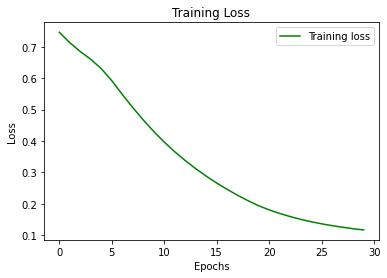

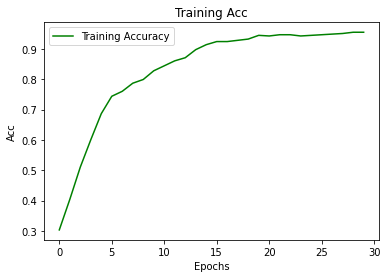

Evaluation
7/7 [==============================] - 0s 2ms/step - loss: 0.1138 - accuracy: 0.9571


[0.11378832906484604, 0.9571428298950195]

In [26]:
loss_train = history1.history['loss']

plt.plot(loss_train, 'g', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_train = history1.history['accuracy']

plt.plot(acc_train, 'g', label='Training Accuracy')
plt.title('Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

print("Evaluation")
model1.evaluate(X_test_scaled, y_test)


#### 3-2-1) Model 2

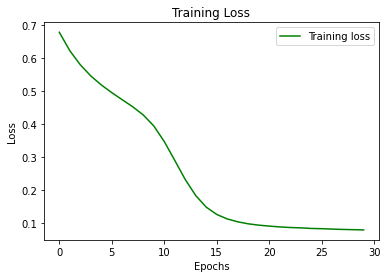

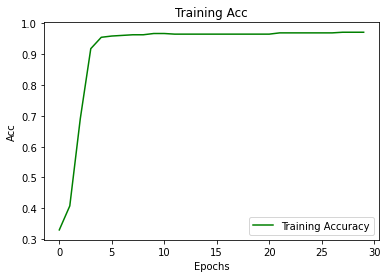

Evaluation
7/7 [==============================] - 0s 2ms/step - loss: 0.0815 - accuracy: 0.9667


[0.08154818415641785, 0.9666666388511658]

In [27]:
loss_train2 = history2.history['loss']

plt.plot(loss_train2, 'g', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_train2 = history2.history['accuracy']

plt.plot(acc_train2, 'g', label='Training Accuracy')
plt.title('Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

print("Evaluation")
model2.evaluate(X_test_scaled, y_test)


#### 3-2-1) Model 3

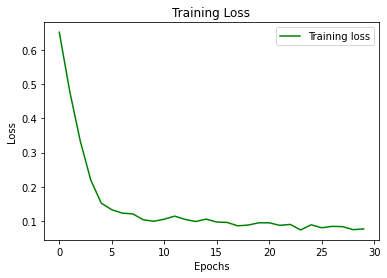

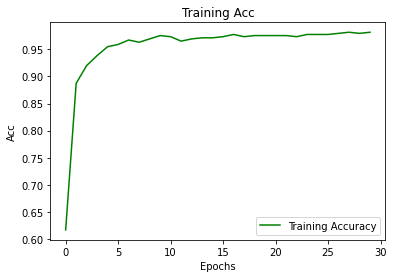

Evaluation
7/7 [==============================] - 0s 2ms/step - loss: 0.0735 - accuracy: 0.9714


[0.07354230433702469, 0.9714285731315613]

In [28]:
loss_train3 = history3.history['loss']

plt.plot(loss_train3, 'g', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_train3 = history3.history['accuracy']

plt.plot(acc_train3, 'g', label='Training Accuracy')
plt.title('Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

print("Evaluation")
model3.evaluate(X_test_scaled, y_test)


# 4) Train the model on the training data. Experiment with different number of epochs.

### 4-1) Epochs=10

In [29]:
history1_epoch10 = model3.fit(X_train_scaled, y_train,batch_size = 5, epochs=10, verbose=1)

Epoch 1/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0850 - accuracy: 0.9775
Epoch 2/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0812 - accuracy: 0.9795
Epoch 3/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0899 - accuracy: 0.9754
Epoch 4/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0695 - accuracy: 0.9795
Epoch 5/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0725 - accuracy: 0.9795
Epoch 6/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0717 - accuracy: 0.9816
Epoch 7/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0740 - accuracy: 0.9775
Epoch 8/10
98/98 [==============================] - 0s 3ms/step - loss: 0.0651 - accuracy: 0.9816
Epoch 9/10
98/98 [==============================] - 0s 4ms/step - loss: 0.0647 - accuracy: 0.9816
Epoch 10/10
98/98 [==============================] - 0s 4ms/step - loss: 0.0643 - accuracy: 0.9795


In [30]:
acc_epoch10 = history1_epoch10.history['accuracy']
print(max(acc_epoch10))

0.9815573692321777


### 4-2) Epochs=20

In [31]:
history2_epoch20 = model3.fit(X_train_scaled, y_train,batch_size = 5, epochs=20, verbose=1)

Epoch 1/20
98/98 [==============================] - 0s 4ms/step - loss: 0.0616 - accuracy: 0.9795
Epoch 2/20
98/98 [==============================] - 0s 4ms/step - loss: 0.0487 - accuracy: 0.9795
Epoch 3/20
98/98 [==============================] - 0s 4ms/step - loss: 0.0561 - accuracy: 0.9795
Epoch 4/20
98/98 [==============================] - 0s 3ms/step - loss: 0.0641 - accuracy: 0.9775
Epoch 5/20
98/98 [==============================] - 0s 3ms/step - loss: 0.0590 - accuracy: 0.9836
Epoch 6/20
98/98 [==============================] - 0s 4ms/step - loss: 0.0594 - accuracy: 0.9816
Epoch 7/20
98/98 [==============================] - 0s 4ms/step - loss: 0.0637 - accuracy: 0.9775
Epoch 8/20
98/98 [==============================] - 0s 4ms/step - loss: 0.0455 - accuracy: 0.9857
Epoch 9/20
98/98 [==============================] - 0s 4ms/step - loss: 0.0546 - accuracy: 0.9836
Epoch 10/20
98/98 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9836
Epoch 11/20
98/98 [

In [32]:
acc_epoch20 = history2_epoch20.history['accuracy']
print(max(acc_epoch20))

0.9897540807723999


### 4-3) Epochs=60

In [33]:
history3_epoch60 = model3.fit(X_train_scaled, y_train,batch_size = 5, epochs=60, verbose=1)

Epoch 1/60
98/98 [==============================] - 0s 3ms/step - loss: 0.0490 - accuracy: 0.9734
Epoch 2/60
98/98 [==============================] - 0s 3ms/step - loss: 0.0489 - accuracy: 0.9836
Epoch 3/60
98/98 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9918
Epoch 4/60
98/98 [==============================] - 0s 3ms/step - loss: 0.0406 - accuracy: 0.9836
Epoch 5/60
98/98 [==============================] - 0s 3ms/step - loss: 0.0524 - accuracy: 0.9795
Epoch 6/60
98/98 [==============================] - 0s 3ms/step - loss: 0.0444 - accuracy: 0.9857
Epoch 7/60
98/98 [==============================] - 0s 3ms/step - loss: 0.0429 - accuracy: 0.9836
Epoch 8/60
98/98 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.9857
Epoch 9/60
98/98 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9877
Epoch 10/60
98/98 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9898
Epoch 11/60
98/98 [

In [34]:
acc_epoch60 = history3_epoch60.history['accuracy']
print(max(acc_epoch60))

1.0


### 4-4) Epochs=100

In [35]:
history4_epoch100 = model3.fit(X_train_scaled, y_train,batch_size = 5, epochs=100, verbose=1)

Epoch 1/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0350 - accuracy: 0.9877
Epoch 2/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9959
Epoch 3/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9959
Epoch 4/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9918
Epoch 5/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9980
Epoch 6/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.9877
Epoch 7/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 0.9959
Epoch 8/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9877
Epoch 9/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.9877
Epoch 10/100
98/98 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9959
Epoch 11/

In [36]:
acc_epoch100 = history4_epoch100.history['accuracy']
print(max(acc_epoch100))

1.0


# 5) What were the ’loss’ and accuracy values attained?

Best

<b>Train Loss</b> = 0.0001506

<b>Train Accuracy</b> = %100


Best Loss and Accuracy values configurations

---
Layers= 4

Unit Numbers = 20

Activation Function = Relu

Last Layer Activation Function = Sigmoid

Optimizer = Adam

Epoch = 100 or higher

Loss Function = Binary CrossEntropy



# 6) Use the trained model to make the predictions on the test data.

In [37]:
predictions = model3.predict (X_test_scaled)

In [38]:
predictions = np.round(predictions).reshape(y_test.shape[0])

In [39]:
predictions

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 1.], dtype=float32)

#7) Show the confusion matrix corresponding to the test data.

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
cm = confusion_matrix(y_test, predictions)

In [42]:
cm

array([[ 73,   2],
       [  3, 132]])

# 8) Show the classification report

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        75
           1       0.99      0.98      0.98       135

    accuracy                           0.98       210
   macro avg       0.97      0.98      0.97       210
weighted avg       0.98      0.98      0.98       210



# 9) Comment on the effect of using different number of layers and different number of neurons in layers on the accuracy of the predictions.

* As the number of layers and the number of neurons increase, the train loss convergence occurs faster. Likewise, accuracy convergence is also faster.
* Accuracy in different number of layers is close to each other because of consistency of the dataSet and no noise data etc. As the number of layers and neurons increases, accuracy slightly goes up.

#10) How does the accuracy change by using different splits of the data, such as 70%, 75%, and 80%?

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled = scaler2.fit_transform(X_test)

In [47]:
history1 = model1.fit(X_train_scaled, y_train, epochs=30, verbose=1)

Epoch 1/30
18/18 [==============================] - 0s 3ms/step - loss: 0.1140 - accuracy: 0.9552
Epoch 2/30
18/18 [==============================] - 0s 2ms/step - loss: 0.1102 - accuracy: 0.9570
Epoch 3/30
18/18 [==============================] - 0s 2ms/step - loss: 0.1064 - accuracy: 0.9624
Epoch 4/30
18/18 [==============================] - 0s 3ms/step - loss: 0.1034 - accuracy: 0.9624
Epoch 5/30
18/18 [==============================] - 0s 3ms/step - loss: 0.1009 - accuracy: 0.9624
Epoch 6/30
18/18 [==============================] - 0s 2ms/step - loss: 0.0986 - accuracy: 0.9624
Epoch 7/30
18/18 [==============================] - 0s 3ms/step - loss: 0.0967 - accuracy: 0.9624
Epoch 8/30
18/18 [==============================] - 0s 3ms/step - loss: 0.0947 - accuracy: 0.9659
Epoch 9/30
18/18 [==============================] - 0s 2ms/step - loss: 0.0932 - accuracy: 0.9659
Epoch 10/30
18/18 [==============================] - 0s 2ms/step - loss: 0.0919 - accuracy: 0.9659
Epoch 11/30
18/18 [

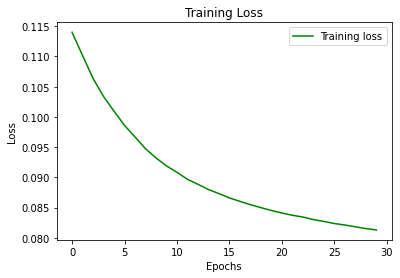

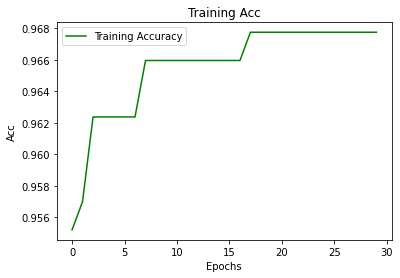

Evaluation
5/5 [==============================] - 0s 3ms/step - loss: 0.0751 - accuracy: 0.9786


[0.07510096579790115, 0.9785714149475098]

In [48]:
loss_train = history1.history['loss']

plt.plot(loss_train, 'g', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc_train = history1.history['accuracy']

plt.plot(acc_train, 'g', label='Training Accuracy')
plt.title('Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

print("Evaluation")
model1.evaluate(X_test_scaled, y_test)


In [49]:
predictions = model1.predict (X_test_scaled)

In [50]:
predictions = np.round(predictions).reshape(y_test.shape[0])

In [51]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        51
           1       1.00      0.97      0.98        89

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



**Result:** All parameters were used the same, only the percentage of the train test split was used as 70% in one and 80% in the other. 

* Training accuracy is 98% in the dataset allocated as 80% train 30% test
* Training accuracy is 98% in the dataset allocated as 70% train 30% test


In [53]:
%%shell
jupyter nbconvert --to html /content/Assignment1 (1).ipynb

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `jupyter nbconvert --to html /content/Assignment1 (1).ipynb'


CalledProcessError: ignored